In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tokenizer import Tokenizer # 昨日建立的函式庫

In [2]:
negative_words = ["disappointed", "sad", "frustrated", "painful", "worried", "angry"]
positive_words = ["happy", "successful", "joyful", "lucky", "love", "hopeful"]

# 建立初始值
all_words = negative_words + positive_words
tokenizer = Tokenizer(all_words, special_token = ['[UNK]','[PAD]'], max_len = 1)
token2num, num2token = tokenizer.token2num, tokenizer.num2token

In [3]:
input_data = torch.tensor([token2num[i] for i in negative_words + positive_words])
labels = len(negative_words) * [[1., 0.]] + len(positive_words) * [[0., 1.]]
labels = torch.tensor(labels)
print('第0筆訓練資料:', input_data[0])
print('第0筆訓練標籤:', labels[0])

第0筆訓練資料: tensor(3)
第0筆訓練標籤: tensor([1., 0.])


In [4]:
class EmbDNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, output_size, padding_idx):
        super().__init__()
        self.embedding = nn.Embedding(
                                num_embeddings = vocab_size, 
                                embedding_dim = embedding_dim,
                                padding_idx = padding_idx

                             )
        
        self.fc = nn.Linear(embedding_dim, output_size)

    def forward(self, x):
        embedded = self.embedding(x)
        out = self.fc(embedded)  
        return out

    
vocab_size = len(token2num)       # 詞彙表大小
embedding_dim = 2                 # 詞嵌入層维度
output_size = 2                   # 輸出大小（分類數量）
padding_idx = token2num['[PAD]']  # 取得PAD索引

model = EmbDNN(vocab_size, embedding_dim, output_size, padding_idx)

In [5]:
# 定義損失函數與優化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [6]:
loss_record = []
epochs = 30000
for epoch in range(epochs):
    # 梯度初始化
    optimizer.zero_grad()
    # 前向傳播計算答案
    outputs = model(input_data)
    # Loss計算損失
    loss = criterion(outputs, labels)
    loss_record.append(loss)        # 紀錄該次Epoch的損失值
    
    # 反向傳播計算梯度
    loss.backward()
    # 優化器更新權重
    optimizer.step()
    
    # 每訓練1000次顯示Loss值
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

Epoch [100/30000], Loss: 0.7781305313110352
Epoch [200/30000], Loss: 0.7160820960998535
Epoch [300/30000], Loss: 0.6888815760612488
Epoch [400/30000], Loss: 0.6724376678466797
Epoch [500/30000], Loss: 0.6479117274284363
Epoch [600/30000], Loss: 0.5960329174995422
Epoch [700/30000], Loss: 0.5083333849906921
Epoch [800/30000], Loss: 0.40076255798339844
Epoch [900/30000], Loss: 0.29787346720695496
Epoch [1000/30000], Loss: 0.21461713314056396
Epoch [1100/30000], Loss: 0.15381090342998505
Epoch [1200/30000], Loss: 0.11161129921674728
Epoch [1300/30000], Loss: 0.08273722976446152
Epoch [1400/30000], Loss: 0.06282182782888412
Epoch [1500/30000], Loss: 0.04882194474339485
Epoch [1600/30000], Loss: 0.03875063359737396
Epoch [1700/30000], Loss: 0.03133320435881615
Epoch [1800/30000], Loss: 0.025747524574398994
Epoch [1900/30000], Loss: 0.0214550644159317
Epoch [2000/30000], Loss: 0.018095657229423523
Epoch [2100/30000], Loss: 0.015423503704369068
Epoch [2200/30000], Loss: 0.013267070055007935
E

Epoch [17500/30000], Loss: 6.556508083122026e-07
Epoch [17600/30000], Loss: 6.159143595141359e-07
Epoch [17700/30000], Loss: 6.059803467906022e-07
Epoch [17800/30000], Loss: 5.761780244029069e-07
Epoch [17900/30000], Loss: 5.36441632448259e-07
Epoch [18000/30000], Loss: 5.165734364709351e-07
Epoch [18100/30000], Loss: 4.7683701609457785e-07
Epoch [18200/30000], Loss: 4.4703472212859197e-07
Epoch [18300/30000], Loss: 4.271664977295586e-07
Epoch [18400/30000], Loss: 3.8743007735320134e-07
Epoch [18500/30000], Loss: 3.8743007735320134e-07
Epoch [18600/30000], Loss: 3.6756190979758685e-07
Epoch [18700/30000], Loss: 3.178913630108582e-07
Epoch [18800/30000], Loss: 3.178913630108582e-07
Epoch [18900/30000], Loss: 2.9802316703353426e-07
Epoch [19000/30000], Loss: 2.781549426345009e-07
Epoch [19100/30000], Loss: 2.781549426345009e-07
Epoch [19200/30000], Loss: 2.58286746657177e-07
Epoch [19300/30000], Loss: 2.4835264866851503e-07
Epoch [19400/30000], Loss: 2.3841853646899835e-07
Epoch [19500/3

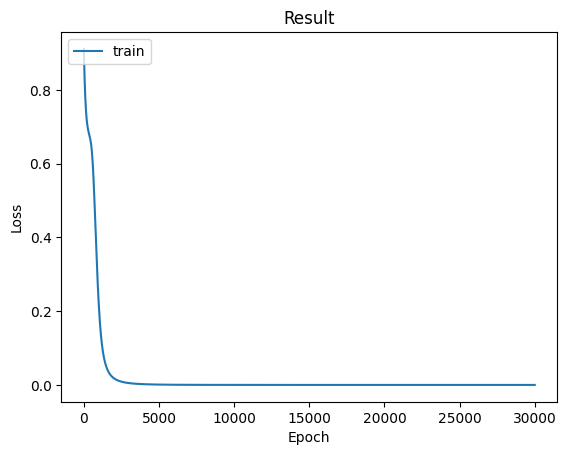

In [7]:
def show_training_loss(train_loss):
    plt.plot(train_loss)
    #標題
    plt.title('Result')
    #y軸標籤
    plt.ylabel('Loss')
    #x軸標籤
    plt.xlabel('Epoch')
    #顯示折線的名稱
    plt.legend(['train'], loc='upper left')
    #顯示折線圖
    plt.show()

show_training_loss(loss_record)

In [8]:
embedding_layer = model.embedding
embedding_weights = embedding_layer.weight.data
torch.save(embedding_weights, 'embedding_weights.pth')

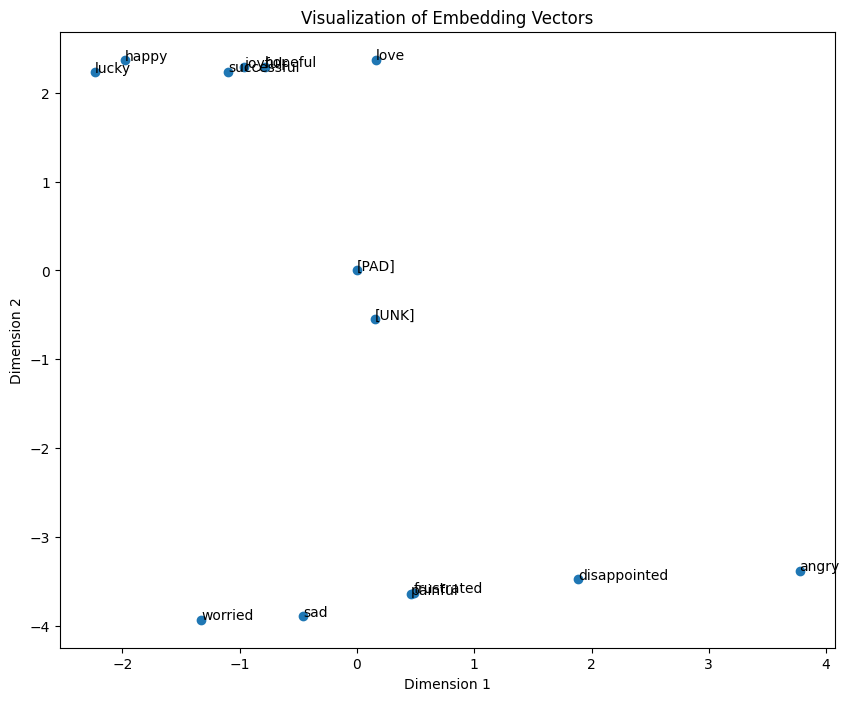

In [9]:
def visualization(embedding_matrix, num2token):
    
    # 提取降維後的坐標
    x_coords = embedding_matrix[:, 0]
    y_coords = embedding_matrix[:, 1]

    # 繪製詞嵌入向量的散點圖
    plt.figure(figsize=(10, 8))
    plt.scatter(x_coords, y_coords)

    # 標註散點
    for i in range(len(embedding_matrix)):
        plt.annotate(num2token[i], (x_coords[i], y_coords[i]))
        
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Visualization of Embedding Vectors')
    plt.show()


token_nums = [i for i in num2token] 
token_nums = torch.tensor(token_nums)
emb = nn.Embedding(len(token_nums), 2)
loaded_embedding_weights = torch.load('embedding_weights.pth')
emb.weight = nn.Parameter(loaded_embedding_weights)
embedding_vector = emb(token_nums).detach().numpy()
visualization(embedding_vector, num2token)